# 프로젝트 (2) : Tip 데이터 분석하기

## 1. 데이터 분석 준비하기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
# 데이터 불러오기
data = sns.load_dataset("tips")
tips = data
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [6]:
# 결측치 확인
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

#### tip_rate 컬럼 추가
tip_rate = tip / total_bill

In [7]:
tips['tip_rate'] = round(tips['tip']/tips['total_bill'] * 100, 2)
tips

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
5,25.29,4.71,Male,No,Sun,Dinner,4,18.62
6,8.77,2.00,Male,No,Sun,Dinner,2,22.81
7,26.88,3.12,Male,No,Sun,Dinner,4,11.61
8,15.04,1.96,Male,No,Sun,Dinner,2,13.03
9,14.78,3.23,Male,No,Sun,Dinner,2,21.85


## 2. 데이터셋 뜯어보기

### (1) Sex

In [9]:
#웨이터의 성별 값 확인하기
tips.groupby('sex').size()

sex
Male      157
Female     87
dtype: int64

In [10]:
sex_count = tips.groupby('sex').size().reset_index(name = "counts")
sex_count

,sex,counts
0,Male,157
1,Female,87


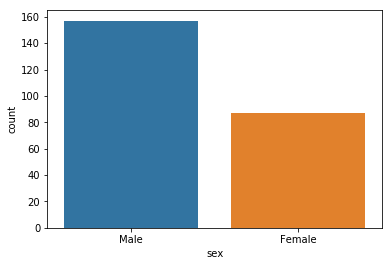

In [13]:
# 그래프로 성별 확인해보기
sns.countplot(data = tips, x = "sex")
plt.show()

In [12]:
print("Male   ", "{:.1f}%".format(sex_count.loc[0, "counts"] / len(tips) * 100))
print("Female ", "{:.1f}%".format(sex_count.loc[1, "counts"] / len(tips) * 100))

Male    64.3%
Female  35.7%


### (2) smoker

In [14]:
# groupby 를 활용해 흡연 여부 데이터 프레임 형식으로 보기
smoker_count = tips.groupby('smoker').size().reset_index(name = "count")
smoker_count

,smoker,count
0,Yes,93
1,No,151


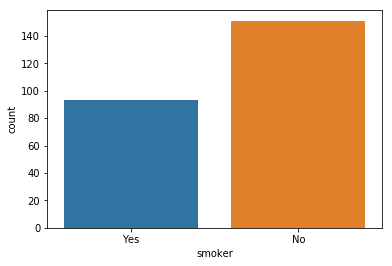

In [15]:
# 데이터 시각화해보기 
sns.countplot(data = tips, x= "smoker")
plt.show()

### (3) day, time

In [16]:
# counts 컬럼에 동일하게 1 값을 넣어주기
tips["counts"] = 1
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate,counts
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,1
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05,1
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66,1
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,1
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,1


In [17]:
# index 는 time 으로, columns 는 day 로 설정하여 피봇 테이블 만들기 
tips.pivot_table("counts", index= "time", columns = "day", aggfunc = 'sum')

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,61.0,7.0,NaN,NaN
Dinner,1.0,12.0,87.0,76.0


In [18]:
# 빈 값은 0으로 채워주고 정수형으로 형 변환해주기
tips.pivot_table("counts", index = "time", columns = "day", aggfunc = "sum", margins = True).fillna(0).astype('int64')

day,Thur,Fri,Sat,Sun,All
time,,,,,
Lunch,61,7,0,0,68
Dinner,1,12,87,76,176
All,62,19,87,76,244


In [20]:
# 비율 확인하기
round(19 / 244 * 100,2)

7.79

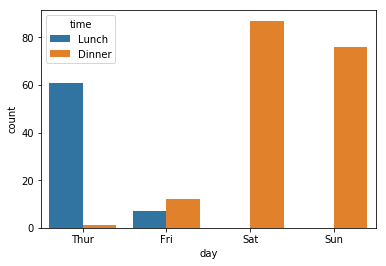

In [21]:
# 그래프로 시각화해보기
sns.countplot(data = tips, x = "day", hue = "time")
plt.show()

### (4) size

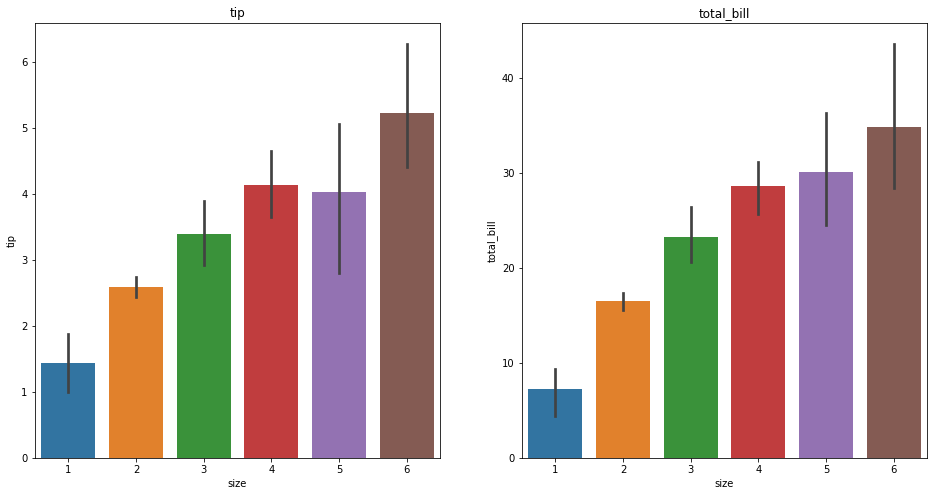

In [25]:
# size = 테이블 인원수

plt.figure(figsize = (16,8))
plt.subplot(121)
sns.barplot(data = tips, x = "size", y = "tip")
plt.title("tip")

plt.subplot(122)
sns.barplot(data = tips, x = "size", y = "total_bill")
plt.title("total_bill")

plt.show()

In [26]:
sns.set_palette("Set2")
# sns.set_palette("Paired")
#sns.set_palette("husl")

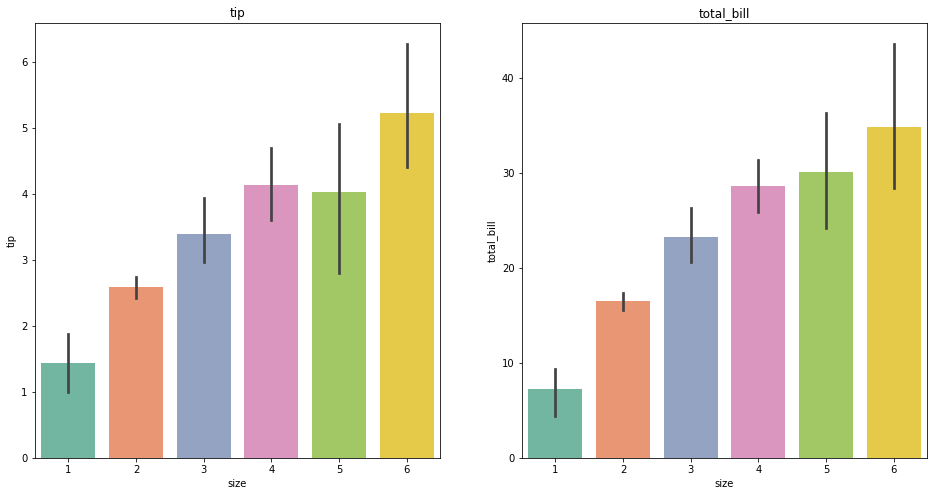

In [27]:
# 그래프 색상 바꿔서 다시 출력해보기 
plt.figure(figsize = (16, 8))

plt.subplot(121)
sns.barplot(data = tips, x = "size", y = 'tip')
plt.title('tip')

plt.subplot(122)
sns.barplot(data = tips, x = "size", y = "total_bill")
plt.title('total_bill')

plt.show()

#### size별 데이터 개수

In [30]:
# 테이블 인원수 데이터 개수 확인해보기
tips.groupby('size').size().reset_index(name="counts")

,size,counts
0,1,4
1,2,156
2,3,38
3,4,37
4,5,5
5,6,4


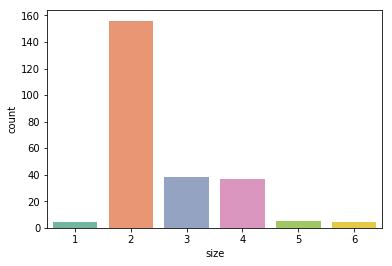

In [29]:
# 확인한 데이터 개수 시각화해보기
sns.countplot(data = tips, x = 'size')
plt.show()

## 3. 가설을 세우고 세부분석 하기

### 가설 : 테이블의 인원수를 나타내는 size컬럼은 tip을 결정짓는 중요한 요소일 것이다.

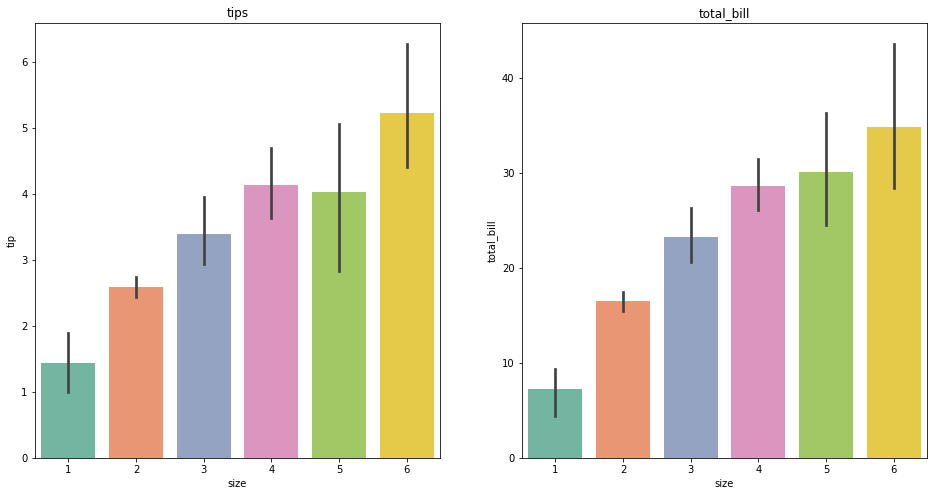

In [31]:
# size 에 따른 tip, tip_rate 그래프 시각화하기
plt.figure(figsize = (16,8))

plt.subplot(121)
sns.barplot(data = tips, x = "size", y = 'tip')
plt.title("tips")

plt.subplot(122)
sns.barplot(data = tips, x = "size", y = "total_bill")
plt.title("total_bill")

plt.show()

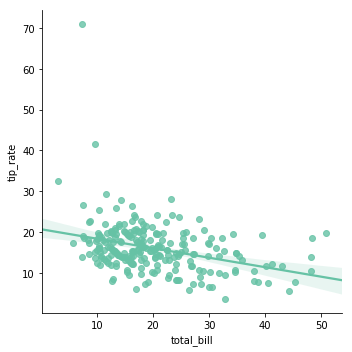

In [32]:
# total_bill 과 tip_rate의 관계

# order=1 인 경우: 1차 함수
sns.lmplot(data=tips, x="total_bill", y="tip_rate", fit_reg=True, order=1)
plt.show()

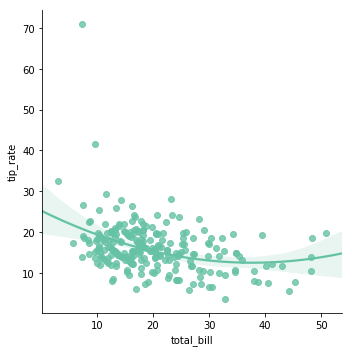

In [33]:
# order=2 인 경우: 2차 함수
sns.lmplot(data=tips, x="total_bill", y="tip_rate", fit_reg=True, order=2)
plt.show()

#### 이상치(Outlier) 확인

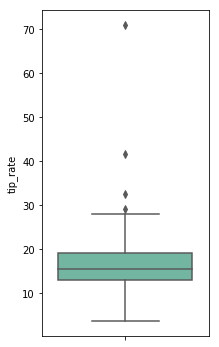

In [35]:
# 시각화로 이상치 확인해보기
plt.figure(figsize = (3,6))
sns.boxplot(data = tips, y = "tip_rate")
plt.show()

In [36]:
# 70%이상의 팁 비율(이상치) 확인하기
tips[tips['tip_rate'] >= 70]

,total_bill,tip,sex,smoker,day,time,size,tip_rate,counts
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.03,1


In [37]:
# drop 함수로 이상치 제거하기
tips = tips.drop(172)
print(tips.shape)

(243, 9)


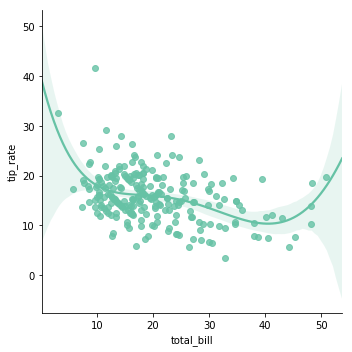

In [38]:
# 이상치 제거 이후 분포 다시 확인해보기 
sns.lmplot(data = tips, x= "total_bill", y = "tip_rate", fit_reg = True, order = 5)
plt.show()

#### 그렇다면, `tip_rate`가 작은  큰 테이블이 좋은가, 아니면 `tip_rate`가 큰 작은 테이블이 좋은가?

In [39]:
# describe 함수로 통계량 확인해보기
tips.groupby('size').describe()["tip"]

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
1,4.0,1.437500,0.506516,1.00,1.0000,1.415,1.8525,1.92
2,155.0,2.565742,0.966660,1.00,2.0000,2.500,3.1250,5.85
3,38.0,3.393158,1.557344,1.36,2.3575,3.290,3.6825,10.00
4,37.0,4.135405,1.640668,2.00,3.0000,3.760,5.0700,9.00
5,5.0,4.028000,1.440111,2.00,3.0000,5.000,5.0000,5.14
6,4.0,5.225000,1.053170,4.20,4.8000,5.000,5.4250,6.70


### [가설] size는 tip을 결정짓는 가장 중요한 요소이다 : 결론

### 결론을 낸 후의 고찰

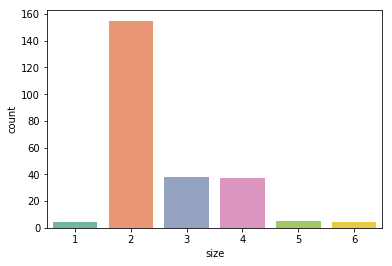

In [40]:
# size 다시 한번 시각화해보기
sns.countplot(data = tips, x = "size")
plt.show()